In [1]:
from Alavian import print_matrix, norm, off, jacobi_rotation, real_eigen, hermitian_eigensystem, real_eigen2, hermitian_eigensystem2, anharmonic
import numpy as np
import copy
from IPython.display import display, Math
from scipy import linalg
from scipy.stats import unitary_group
import matplotlib.pyplot as plt
plt.style.use("ggplot")

import math
from numpy.polynomial.hermite import hermval

# Code Tests

# Norm Code Tests

In [2]:
fiver = np.ones((5,5))
tener = np.ones((10,10))
dub = np.ones((20,20))
thirty = np.ones((30,30))
hunnid = np.ones((100,100))

In [3]:
print(norm(fiver))
print(norm(tener))
print(norm(dub))
print(norm(thirty))
print(norm((hunnid)))

5.0
10.0
20.0
30.0
100.0


I created matricies filled with ones so the norm should just be equal to the total matrix size

# Off Code Tests

In [4]:
off(fiver)

# 25 - 5 = 20 so were looking at square root of 20, seems legit :)

4.47213595499958

In [5]:
off(tener)

# 100 - 10 = 90, sqrt(90) = 9.48 looks good

9.486832980505138

In [6]:
off(dub)
# 400 - 20 = 380, sqrt(380) = 19.49 :)

19.493588689617926

In [7]:
off(thirty)
# 900 - 30 = 870, sqrt(870) = 29.49 :)

29.49576240750525

In [8]:
off(hunnid)
# 10000 - 100 = 9900, sqrt(9900) = 99.49 :)

99.498743710662

# Jacobi Rotations Test
We should recieve a matrix where the selected row elements (j, k) and (k, j) should be eleminated, as well as recieve an orthongonal matrix, the Jacobi Rotation. To test I multiply it against its own transpose to make sure it returns the identity matrix

In [9]:
p,o = jacobi_rotation(fiver, 4, 3)
print_matrix(p)
print_matrix(o)
print_matrix(o @ o.T)
# Slightly innacurate but I think this is within an acceptable margin.
# We are testing to make sure we are given back an orthogonal matrix
# by multiplying it against its tranpose to recieve the identity 
# e-17 is within reasonable tolerance

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [10]:
p,o = jacobi_rotation(tener, 4, 3)
#print_matrix(p)
#print_matrix(o)
print_matrix(o @ o.T)
# For these lager matricies I will only print the jacobi multiplied its transpose for proof of concept

<IPython.core.display.Math object>

In [11]:
p,o = jacobi_rotp,o = jacobi_rotation(dub, 4, 3)
#print_matrix(p)
#print_matrix(o)
print_matrix(o @ o.T)
# For these lager matricies I will only print the jacobi multiplied its transpose for proof of concept

<IPython.core.display.Math object>

In [12]:
p,o = jacobi_rotation(thirty, 4, 3)
#print_matrix(p)
#print_matrix(o)
print_matrix(o @ o.T)
# For these lager matricies I will only print the jacobi multiplied its transpose for proof of concept

<IPython.core.display.Math object>

In [13]:
p,o = jacobi_rotation(hunnid, 4, 3)
print(o @ o.T)
# the print matrix function is nice but it breaks my computer lol but it does work all the way up to 100x100

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


# Real Eigen Testing

In [14]:
a = np.array( [ [1,1.2,2],[1.2,3,1.2],[2,1.2,1] ] )
o, p = real_eigen(a, 1e-8)
print_matrix(o)
print_matrix(p)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [15]:
# real eigen should give a nx1 array of eigenvalues repeated to multiplicity, and an orthogonal matrix
o, p = real_eigen(fiver, 1e-5)
print_matrix(o)
print_matrix(p)

#looks withing tolerance (:

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [16]:
# real eigen should give a list of eigenvalues, and an orthogonal matrix, which when multiplied together should return the identity matrix
o, p = real_eigen(tener, 1e-5)
print_matrix(o)
print_matrix(p @ p.T)

#looks withing tolerance (:
# for these larger matricies I mulitiplied the output by its transpose to make sure it returns the identity matrix

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [17]:
# real eigen should give a list of eigenvalues, and an orthogonal matrix
o, p = real_eigen(thirty, 1e-5)
print(o)
print(p @ p.T)

#looks within tolerance (:

[-1.51468208e-15 -2.64065549e-16 -2.55548622e-16 -1.47818912e-16
 -1.32014159e-16 -5.51403774e-17 -5.07124295e-17 -4.60649432e-17
 -4.23428499e-17  0.00000000e+00  1.97896172e-18  2.63132352e-18
  3.27991106e-18  1.22460804e-17  1.56386384e-17  2.21716941e-17
  2.63826147e-17  2.80224161e-17  2.92696220e-17  3.06240984e-17
  3.27522508e-17  5.28690928e-17  5.40412021e-17  6.36259652e-17
  1.22181521e-16  3.16722224e-16  5.12325046e-16  9.53808589e-16
  3.00912345e-15  3.00000000e+01]
[[ 1.00000000e+00  2.08177031e-17  9.02066421e-17  1.31840006e-16
   1.17962218e-16 -1.76196510e-17 -1.58268971e-16 -9.39474840e-17
  -5.92530144e-17 -5.41855628e-17 -1.76196510e-17  1.70748185e-17
  -2.64299872e-17 -7.31308022e-17 -1.21703060e-16 -8.32657055e-17
  -8.96577242e-17 -6.19021485e-17 -3.46934482e-17 -3.14974388e-17
   1.02136193e-21 -5.06643026e-18 -4.66997937e-17 -4.48283514e-17
  -2.08156603e-17 -1.06807571e-17 -2.96259965e-17  3.19703070e-18
  -3.14974388e-17  2.40137124e-17]
 [ 2.08177031e

In [18]:
o, p = real_eigen(hunnid, 1e-5)
#print(o)
print(p @ p.T)

[[ 1.00000000e+00  1.79578574e-16  4.50195436e-16 ...  3.46944695e-18
   3.59955121e-17  0.00000000e+00]
 [ 1.79578574e-16  1.00000000e+00  4.50195436e-16 ...  3.46944695e-18
   3.59955121e-17  0.00000000e+00]
 [ 4.50195436e-16  4.50195436e-16  1.00000000e+00 ...  6.93889390e-18
   5.76795556e-17  2.08166817e-17]
 ...
 [ 3.46944695e-18  3.46944695e-18  6.93889390e-18 ...  1.00000000e+00
  -2.70616862e-16  1.38777878e-17]
 [ 3.59955121e-17  3.59955121e-17  5.76795556e-17 ... -2.70616862e-16
   1.00000000e+00 -4.16333634e-17]
 [ 0.00000000e+00  0.00000000e+00  2.08166817e-17 ...  1.38777878e-17
  -4.16333634e-17  1.00000000e+00]]


# Testing Hermitian eigensystems
I have created matrices filled with numbers 1 to NxN and used them as my diagonals, so that when we create our hermitian matrix using the unitary function I will already know the eigenvalues and be able to check the accuracy of our results.

In [19]:
unitary = unitary_group.rvs(10)
inverse = np.linalg.inv(unitary)
diagonal = np.arange(1,101).reshape(10,10)
diagonal = np.diag(np.diag(diagonal))

f = inverse @ diagonal @ unitary
a, b = hermitian_eigensystem(f, 1e-8)

print_matrix(diagonal)
print_matrix(a)
print_matrix(b)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Im going to stop using print matrix my computer really doesnt like it for the large ones

In [20]:
unitary = unitary_group.rvs(30)
inverse = np.linalg.inv(unitary)
diagonal = np.arange(1,901).reshape(30,30)
diagonal = np.diag(np.diag(diagonal))

f = inverse @ diagonal @ unitary
a, b = hermitian_eigensystem(f, 1e-8)

print(diagonal)
print(a)
print(b)

[[  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  32   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  63   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  94   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 125   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 156   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 187   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 218   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]


In [21]:
unitary = unitary_group.rvs(100)
inverse = np.linalg.inv(unitary)
diagonal = np.arange(1,10001).reshape(100,100)
diagonal = np.diag(np.diag(diagonal))

f = inverse @ diagonal @ unitary
#a, b = hermitian_eigensystem(f, 1e-8)

print(diagonal)
print(a)
#print_matrix(b)

# Could probably be optimized but runtime wasn't too bad :)
# The matrix is so big it took longer to process the math typesetting and printmatrix function then it did
# to actually compile
# I left out the eigenvectors commented out so i could restart the kernal and run all without having to wait forever

[[    1     0     0 ...     0     0     0]
 [    0   102     0 ...     0     0     0]
 [    0     0   203 ...     0     0     0]
 ...
 [    0     0     0 ...  9798     0     0]
 [    0     0     0 ...     0  9899     0]
 [    0     0     0 ...     0     0 10000]]
[  1.  32.  63.  94. 125. 156. 187. 218. 249. 280. 311. 342. 373. 404.
 435. 466. 497. 528. 559. 590. 621. 652. 683. 714. 745. 776. 807. 838.
 869. 900.]


# Part B Analysis of Quantum Anharmonic Oscillator

1) I wrote the proof by hand and included the photos

2) Numeric approximation

In [22]:
F = anharmonic(30, 0.05)

print("First eigenvalue and eigenvector")
print(hermitian_eigensystem2(F,1e-8)[0][0]) 
print(((hermitian_eigensystem2(F,1e-8)[1][:,0]))) 

print("Second eigenvalue and eigenvector")
print(hermitian_eigensystem2(F,1e-8)[0][1]) 
print(hermitian_eigensystem2(F,1e-8)[1][:,1]) 

print("Third eigenvalue and eigenvector")
print(hermitian_eigensystem2(F,1e-8)[0][2]) 
print(hermitian_eigensystem2(F,1e-8)[1][:,2]) 

print("Fourth eigenvalue and eigenvector")
print(hermitian_eigensystem2(F,1e-8)[0][3]) 
print(hermitian_eigensystem2(F,1e-8)[1][:,3]) 

First eigenvalue and eigenvector
[0.53859019]
[ 9.99061287e-01  0.00000000e+00 -4.27213982e-02  0.00000000e+00
 -6.79647774e-03  0.00000000e+00  2.27779777e-03  0.00000000e+00
 -2.01677382e-04  0.00000000e+00 -7.03367053e-05  0.00000000e+00
  3.30857024e-05  0.00000000e+00 -5.34223470e-06  0.00000000e+00
 -8.87597716e-07  0.00000000e+00  8.16776370e-07  0.00000000e+00
 -2.37320680e-07  0.00000000e+00  1.19861889e-08  0.00000000e+00
  2.06395254e-08  0.00000000e+00 -1.16626987e-08  0.00000000e+00
  1.69951731e-09  0.00000000e+00]
Second eigenvalue and eigenvector
[1.67993925]
[ 0.00000000e+00  9.93924553e-01  0.00000000e+00 -1.09794986e-01
  0.00000000e+00 -5.37897988e-03  0.00000000e+00  5.37991376e-03
  0.00000000e+00 -1.07597346e-03  0.00000000e+00 -2.89280221e-05
  0.00000000e+00  8.77105003e-05  0.00000000e+00 -2.81242708e-05
  0.00000000e+00  2.58042908e-06  0.00000000e+00  1.73238711e-06
  0.00000000e+00 -9.95722600e-07  0.00000000e+00  2.43557039e-07
  0.00000000e+00  6.86692014

3) En($\lambda$) vs $\lambda$ over $\lambda$ = (0,1) plots

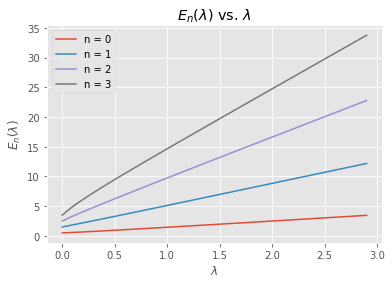

In [23]:
p1 = np.zeros((30,1))
p2 = np.zeros((30,1))
p3 = np.zeros((30,1))
p4 = np.zeros((30,1))

for i in range (0, 30): 
    A = anharmonic(30,(i*0.1))
    A = hermitian_eigensystem2(A,1e-5)[0]
    p1[i] = A[0] 
    p2[i] = A[1] 
    p3[i] = A[2] 
    p4[i] = A[3] 
    
P = np.zeros((30,1))
for i in range (0, 30):
    P[i] = i * 0.1

plt.plot(P,p1,label = 'n = 0')
plt.plot(P,p2,label = 'n = 1')
plt.plot(P,p3,label = 'n = 2')
plt.plot(P,p4,label = 'n = 3')
plt.legend(['n = 0', 'n = 1', 'n = 2', 'n = 3'])
plt.xlabel('$\lambda$')
plt.ylabel('$E_{n}$($\lambda$)')
plt.title('$E_{n}$($\lambda$) vs. $\lambda$')
plt.show()

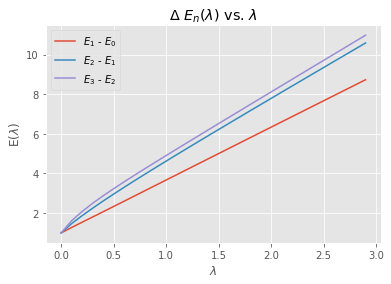

In [24]:
p21 = p2 - p1
p32 = p3 - p2
p43 = p4 - p3

plt.plot(P,p21,label = '$E_{1}$ - $E_{0}$')
plt.plot(P,p32,label = '$E_{2}$ - $E_{1}$')
plt.plot(P,p43,label = '$E_{3}$ - $E_{2}$')

plt.legend()
plt.xlabel('$\lambda$')
plt.ylabel('E($\lambda$)')
plt.title('$\Delta$ $E_{n}$($\lambda$) vs. $\lambda$')
plt.show()

4) En(N) vs N

In [25]:
p1 = np.zeros((30,1))
p2 = np.zeros((30,1))
p3 = np.zeros((30,1))
p4 = np.zeros((30,1))

for i in range (8, 38): 
    A = anharmonic(i,1)
    A = hermitian_eigensystem2(A,1e-5)[0] 

    p1[i-8] = A[0]
    p2[i-8] = A[1]
    p3[i-8] = A[2]
    p4[i-8] = A[3]

P = np.zeros((30,1)) 

for i in range (8, 38):
    P[i-8] = i

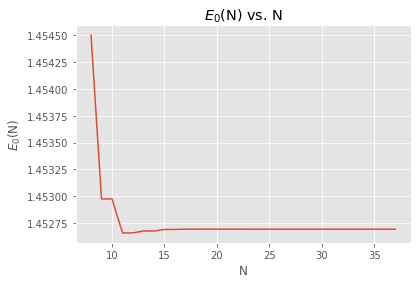

In [26]:
plt.plot(P,p1)
plt.xlabel('N')
plt.ylabel('$E_{0}$(N)')
plt.title('$E_{0}$(N) vs. N')
plt.show()

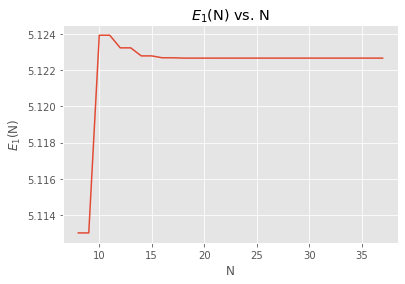

In [27]:
plt.plot(P,p2)
plt.xlabel('N')
plt.ylabel('$E_{1}$(N)')
plt.title('$E_{1}$(N) vs. N')
plt.show()

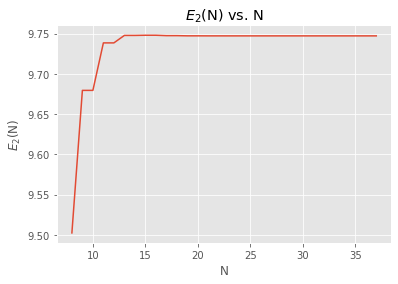

In [28]:
plt.plot(P,p3)
plt.xlabel('N')
plt.ylabel('$E_{2}$(N)')
plt.title('$E_{2}$(N) vs. N')
plt.show()

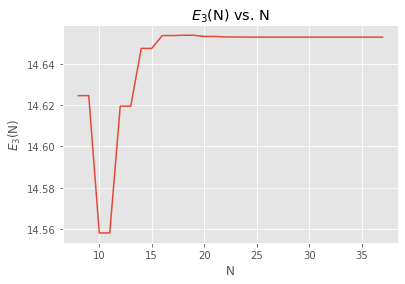

In [29]:
plt.plot(P,p4)
plt.xlabel('N')
plt.ylabel('$E_{3}$(N)')
plt.title('$E_{3}$(N) vs. N')
plt.show()

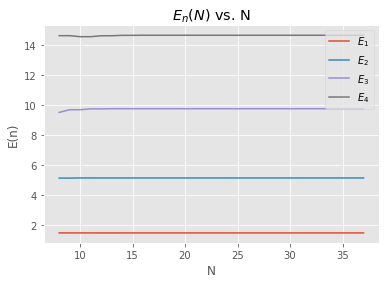

In [30]:
plt.plot(P, p1, label = "$E_{1}$")
plt.plot(P, p2, label = "$E_{2}$")
plt.plot(P, p3, label = "$E_{3}$")
plt.plot(P, p4, label = "$E_{4}$")
plt.legend()
plt.xlabel('N')
plt.ylabel('E(n)')
plt.title('$E_{n}(N)$ vs. N')
plt.show()

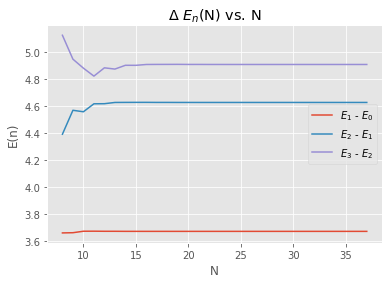

In [31]:
# E1 - E0
p21 = p2 - p1
p32 = p3 - p2
p43 = p4 - p3
plt.plot(P, p21, label = "$E_{1}$ - $E_{0}$")
plt.plot(P, p32, label = "$E_{2}$ - $E_{1}$")
plt.plot(P, p43, label = "$E_{3}$ - $E_{2}$")
plt.legend()
plt.xlabel('N')
plt.ylabel('E(n)')
plt.title('$\Delta$ $E_{n}$(N) vs. N')
plt.show()

5) First four eigenfunctions from lambda = (0,1)

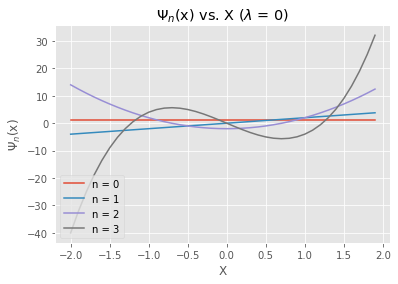

In [32]:
zero = anharmonic(30, 0)
one = anharmonic(30, 1)

Ones = hermitian_eigensystem2(zero,1e-8)[1] 
Zeros = hermitian_eigensystem2(one,1e-8)[1] 

A1 = Ones[0,:]
A2 = Ones[1,:]
A3 = Ones[2,:]
A4 = Ones[3,:]

B1 = Zeros[0,:]
B2 = Zeros[1,:]
B3 = Zeros[2,:]
B4 = Zeros[3,:]

X = np.arange(-2.0, 2.0, step = 0.1)
X = np.array(X)

plt.plot(X,hermval(X,A1)) # n = 0
plt.plot(X,hermval(X,A2)) # n = 1
plt.plot(X,hermval(X,A3)) # n = 2
plt.plot(X,hermval(X,A4)) # n = 3

plt.legend(['n = 0', 'n = 1', 'n = 2', 'n = 3'], loc = 3)
plt.xlabel('X')
plt.ylabel('$\Psi_{n}$(x)')
plt.title('$\Psi_{n}$(x) vs. X ($\lambda$ = 0)')
plt.show()

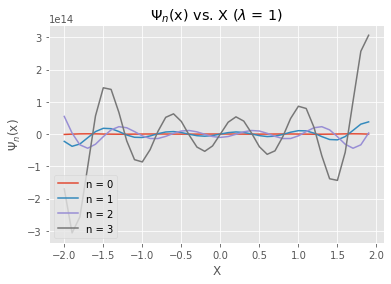

In [33]:
plt.plot(X,hermval(X,B1)) # n = 0
plt.plot(X,hermval(X,B2)) # n = 1
plt.plot(X,hermval(X,B3)) # n = 2
plt.plot(X,hermval(X,B4)) # n = 3
plt.legend(['n = 0', 'n = 1', 'n = 2', 'n = 3'], loc = 3)
plt.xlabel('X')
plt.ylabel('$\Psi_{n}$(x)')
plt.title('$\Psi_{n}$(x) vs. X ($\lambda$ = 1)')
plt.show()